![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resourses

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import libraries**

In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

**Read `Salaries.csv` as a dataframe called `sal`.**

In [0]:
# link = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
sal = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv") 

**Check the head of the DataFrame.**

In [5]:
sal.head() # print the first 5 elements

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [6]:
sal.info() # print summary of sal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [10]:
sal.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [8]:
# mean of "BasePay" in "Sal"

print("The average BasePay: ", sal['BasePay'].mean())

The average BasePay:  66325.44884050643


**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [9]:
print('The lowest amount of BasePay: ', sal['BasePay'].min())

The lowest amount of BasePay:  -166.01


In [11]:
print('The highest amount of BasePay: ', sal['BasePay'].max())

The highest amount of BasePay:  319275.01


**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [13]:
print('Infomations of OvertimePay: ')
sal.describe()['OvertimePay']


Infomations of OvertimePay: 


count    148650.000000
mean       5066.059886
std       11454.380559
min          -0.010000
25%           0.000000
50%           0.000000
75%        4658.175000
max      245131.880000
Name: OvertimePay, dtype: float64

**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [25]:
print('The job title of JOSEPH DRISCOLL:', sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle'].values[0])


The job title of JOSEPH DRISCOLL: CAPTAIN, FIRE SUPPRESSION


In [26]:
# Now try to select Employees who have name "GARY JIMENEZ"
# Your code here
sal[sal['EmployeeName'] == 'GARY JIMENEZ']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [30]:
 print('JOSEPH DRISCOLL makes ',sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits'].values[0])

JOSEPH DRISCOLL makes  270324.91


**What is the name of highest paid person (including benefits)?**

In [34]:
print('the name of highest paid person: ')

# solution 1

print(sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()]['EmployeeName'].values[0])

# solution 2

print( sal.sort_values(by = 'TotalPayBenefits', ascending= False)['EmployeeName'].values[0])

the name of highest paid person: 
NATHANIEL FORD
NATHANIEL FORD


**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [38]:
print('The name of lowest paid persion: ')

# solution 1

print(sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min()]['EmployeeName'].values[0])

# solution 2

print( sal.sort_values(by = 'TotalPayBenefits')['EmployeeName'].values[0])

sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min()]

#There are strange something, he/she has a negative value in 'OtherPay'

The name of lowest paid persion: 
Joe Lopez
Joe Lopez


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [41]:
print('The average (mean) BasePay of all employees per year: ')
sal.groupby('Year').mean()['BasePay']

The average (mean) BasePay of all employees per year: 


Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

Keyword: _unique, nunique_

In [43]:
print(f"There are {sal['JobTitle'].nunique()} job titles")
print(sal['JobTitle'].unique())

There are 2159 job titles
['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'
 'CAPTAIN III (POLICE DEPARTMENT)' 'WIRE ROPE CABLE MAINTENANCE MECHANIC'
 ... 'Conversion' 'Cashier 3' 'Not provided']


**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [45]:
print('The top 5 most common jobs: ')

sal['JobTitle'].value_counts().head()

The top 5 most common jobs: 


Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [55]:
sal[sal['Year'] == 2013]['JobTitle'].value_counts().where(lambda x: x == 1).dropna()

Head Photographer                 1.0
Sheriff (SFERS)                   1.0
Undersheriff                      1.0
Asst Dir, Log Cabin Rnch          1.0
Mgr Museum Security Services      1.0
Animal Control Supervisor         1.0
Captain, (Fire Department)        1.0
Asst Dir of Clinical Svcs 1       1.0
Principal Museum Preparator       1.0
Director, Fiscal Services         1.0
Board Scty, MTA                   1.0
Court Asst., Superior Court       1.0
Chief Fire Alarm Dispatcher       1.0
IS Operator-Journey               1.0
Administrator, DPH                1.0
Transit Paint Shop Sprv1          1.0
Real Estate Devt. Mgr, SFMTA      1.0
Special Assistant 21              1.0
Senior Psychiatric Orderly        1.0
Payroll Supervisor                1.0
IS Technician Assistant           1.0
Media Production Specialist       1.0
Environmental Hlth Tech 2         1.0
Sr Employee Asst Counselor        1.0
Dir, Log Cabin Ranch (SFERS)      1.0
Media Programming Spec            1.0
Vet Laborato

**How many people have the word Chief in their job title?**

In [60]:
print(f"There are {len(sal[sal['JobTitle'].str.contains('Chief')])} people have the word 'Chief' in their job title")

There are 423 people have the word 'Chief' in their job title


## Data Visualization

**Implement seaborn's countplot with x='Year'**

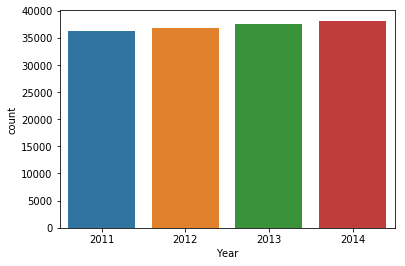

In [63]:
sns.countplot(x = 'Year', data = sal)

**Implement seaborn's distplot for BasePay of Year 2011**

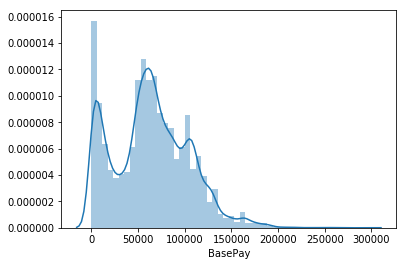

In [67]:
sns.distplot(sal[sal['Year'] == 2011]['BasePay'].dropna()) # There are some NaN value in sal['BasePay']

**How about other Year**

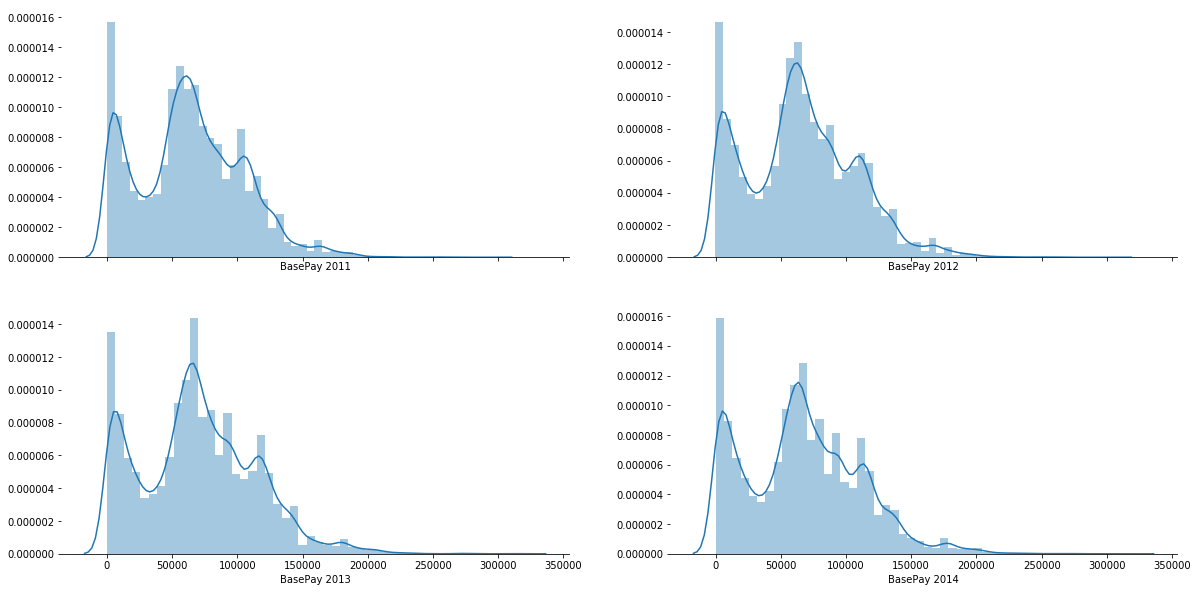

In [85]:
f, axes = plt.subplots(2, 2, figsize=(20, 10), sharex=True)
sns.despine(left=True)

index = 0

for y in sal['Year'].unique():
  sns.distplot(sal[sal['Year'] == y]['BasePay'].dropna(), axlabel=f"BasePay {y}", ax= axes[index // 2, index % 2]) # There are some NaN value in sal['BasePay']
  index += 1

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

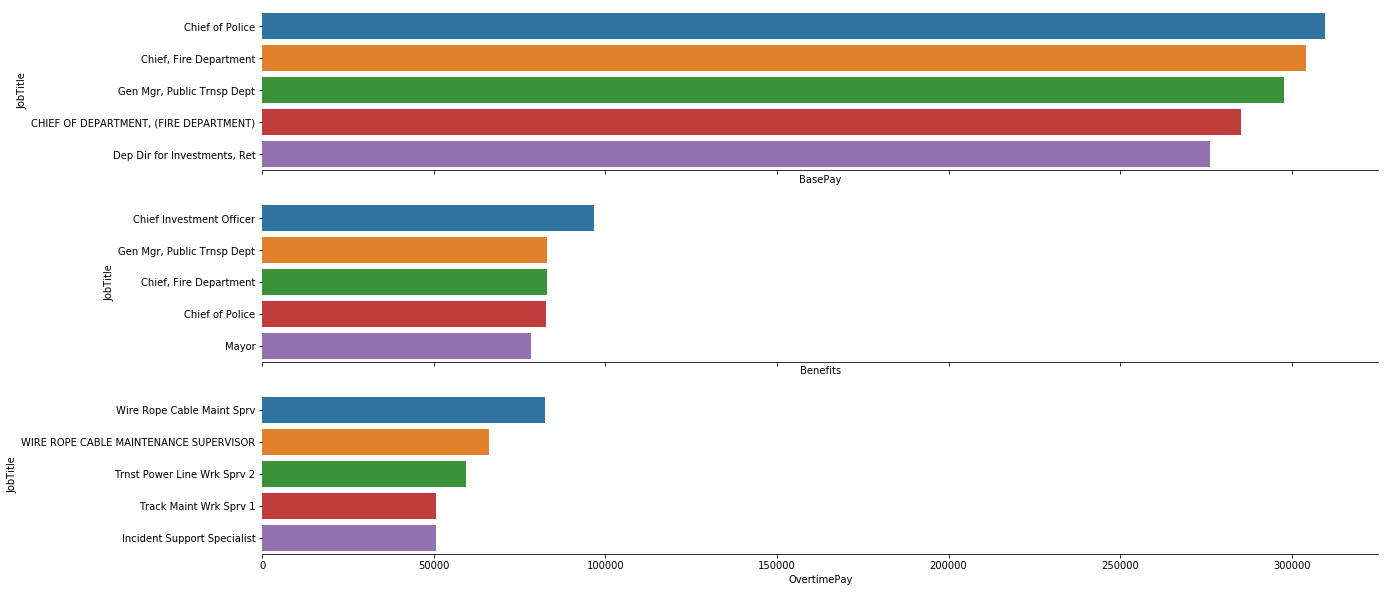

In [111]:
# create a new dataframe, which contains means of BasePay, Benefits, OvertimePay after grouping by JobTitle
new_sal = sal.groupby('JobTitle',as_index=False).mean()[['JobTitle', 'BasePay','Benefits','OvertimePay']]

f, axes = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
sns.despine(left=True)

sns.barplot(x = 'BasePay', y = 'JobTitle', data=new_sal.sort_values(by = 'BasePay', ascending = False).head(), ax = axes[0])
sns.barplot(x = 'Benefits', y = 'JobTitle', data=new_sal.sort_values(by = 'Benefits', ascending = False).head(), ax = axes[1])
sns.barplot(x = 'OvertimePay', y = 'JobTitle', data=new_sal.sort_values(by = 'OvertimePay', ascending = False).head(), ax = axes[2])

**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

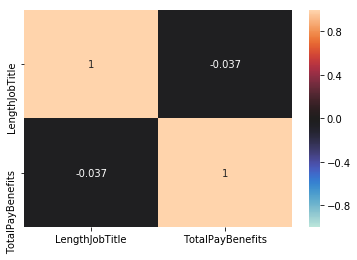

In [118]:
sal['LengthJobTitle'] = sal['JobTitle'].str.len()

sns.heatmap(sal[['LengthJobTitle','TotalPayBenefits']].corr(), vmin=-1, vmax = 1, center = 0, annot=True)

# Great Job!